In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
from mnist import MNIST

In [3]:
class PCA:
    def __init__(self, k):
        self.k = k
        self.mean = None
        self.matrix = None
        self.values = None

    def fit(self, data):
        """
        performs SVD to get the transformation matrix
        """
        self.mean = np.mean(data,axis=0)
        data = data - self.mean
        S = np.cov(data.T)
        u,s,vh = np.linalg.svd(S)
        self.values = s
        self.matrix = u[:,:self.k]      
    def transform(self, data):
        """
        projects data to lower dimensional space
        """
        data = data - self.mean
        Y = np.dot(data,self.matrix)  
        return Y
    def inverse_transform(self, data_transformed):
        """
        reconstructs the data
        """
        Y =  np.dot(data_transformed,self.matrix.T) + self.mean
        return Y
        


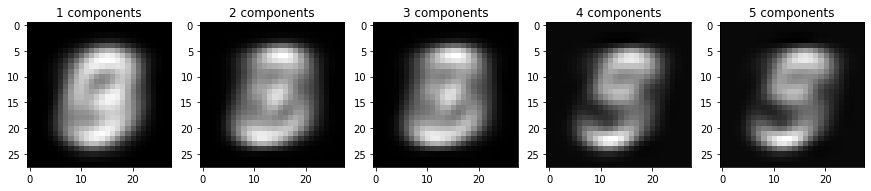

In [4]:
mndata = MNIST('../Data/')
images, labels = mndata.load_training()
images = np.array(images,dtype=float)
model = PCA(1)
model.fit(images)
X_tr = model.transform(images)
X_inv = model.inverse_transform(X_tr)

# TODO: Fit PCA with 5 components


# TODO: Plot each component in subplots (name subplots with ccomponent number)


# TODO: Save the plot with name "MNIST_Components_Yourname"
n_comps = [1, 2, 3, 4, 5]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,20))
for ax,i,n_comp in zip(axes.flatten(),range(len(n_comps)), n_comps):
    model = PCA(n_comp)
    model.fit(images)
    X_tr = model.transform(images)
    X_inv = model.inverse_transform(X_tr)
    ax.imshow(X_inv[0].reshape((28, 28)),cmap='gray')
    ax.set_title("{} components".format(n_comp))
plt.savefig('MNIST_Components_Yourname.png')


In [5]:
# TODO: Generate data with some linear correlations and check the performance of your algorithm
test = np.random.rand(1000,10)


In [6]:
model2 = PCA(10)
model2.fit(test)
X_tr = model2.transform(test)
X_inv = model2.inverse_transform(X_tr)

In [7]:
explained_variance = np.sum(model2.values[0:9]/np.sum(model2.values))
print(explained_variance)

0.9184230485702264


In [8]:
explained_variance = np.sum(model2.values[0:10]/np.sum(model2.values))
print(explained_variance)

0.9999999999999999


# This shows that our random data columns are independent and only taking full number of features we can full explain the data

In [9]:
test2 = 2 *test

In [10]:
test2 =  np.concatenate((test2, test), axis=1)

In [11]:
test2.shape

(1000, 20)

In [12]:
model3 = PCA(10)
model3.fit(test2)
X_tr = model3.transform(test2)
X_inv = model3.inverse_transform(X_tr)

In [13]:
explained_variance = np.sum(model3.values[0:10]/np.sum(model3.values))
print(explained_variance)

1.0


# As we see, if the half of the columns are dependent, then the other half of the colums, which are independent, are enough to explain the data fully.